# Bank Marketing

## Problem Statement 
The data is related to direct marketing campaigns of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

# Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Inspecting the Data

In [3]:
# Shape of the data
df.shape

(4521, 17)

### Dataset Description:

###### Bank client data

1. age (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

###### Data related to the last contact of the current campaign

1. contact: contact communication type (categorical: "unknown","telephone","cellular") 
2. day: last contact day of the month (numeric)
3. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
4. duration: last contact duration, in seconds (numeric)

###### Other attributes:

1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###### Output variable (desired target):

y: has the client subscribed a term deposit? (binary: "yes","no")


In [4]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# Checking the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Checking the number of null values present in the dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#Checking the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Data Preparation

In [8]:
# Dividing the categorical and numerical features
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in df.columns.to_list() if x not in categorical]

In [9]:
# Printing the features
print('Categorical features:', categorical)
print('Numerical features:  ', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features:   ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


In [10]:
# List of variables to map
varlist=['default','housing','loan', 'y']
# Defining the map function
def binary_map(x):
    return x.map({"yes":1, "no":0})
# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


Text(0.5, 0, 'Target Feature No/0 Yes/1')

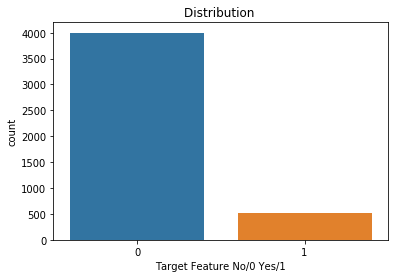

In [12]:
# Plotting the target feature
from matplotlib import pyplot as plt
sns.countplot(x=df['y'])
plt.title('Distribution ')
plt.xlabel('Target Feature No/0 Yes/1')

###### We can say that the data is imbalanced

In [13]:
# Plotting 'job'
df.job.astype('category').value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0.5, 1.0, 'Plot of job for target variable')

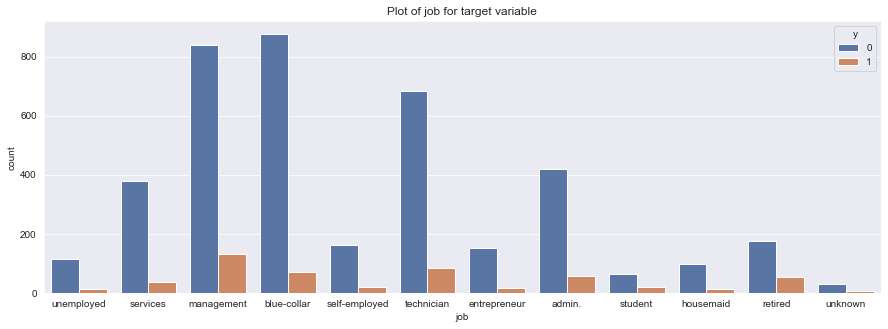

In [14]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x=df['job'], data=df, hue=df['y'])
plt.title('Plot of job for target variable')

In [15]:
# Plotting 'marital'
df.marital.astype('category').value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

Text(0.5, 1.0, 'Plot of marital for target variable')

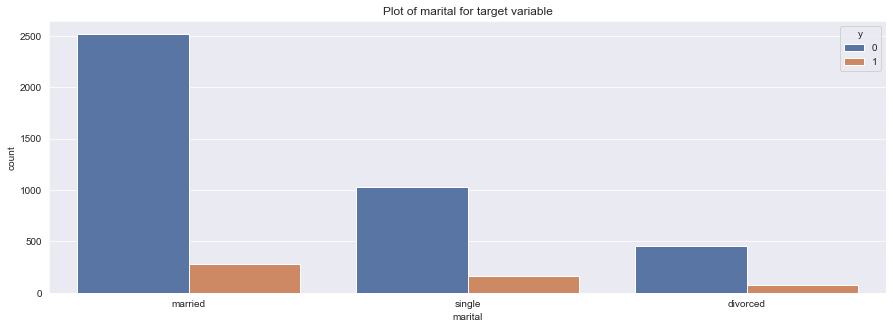

In [16]:
sns.countplot(x=df['marital'], data=df, hue=df['y'])
plt.title('Plot of marital for target variable')

In [17]:
# Plotting 'education'
df.education.astype('category').value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

Text(0.5, 1.0, 'Plot of education for target variable')

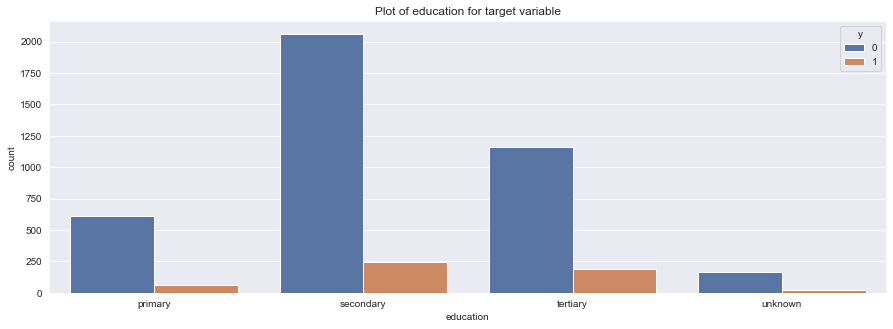

In [18]:
sns.countplot(x=df['education'], data=df, hue=df['y'])
plt.title('Plot of education for target variable')

In [19]:
# Plotting 'contact'
df.contact.astype('category').value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

Text(0.5, 1.0, 'Plot of contact for target variable')

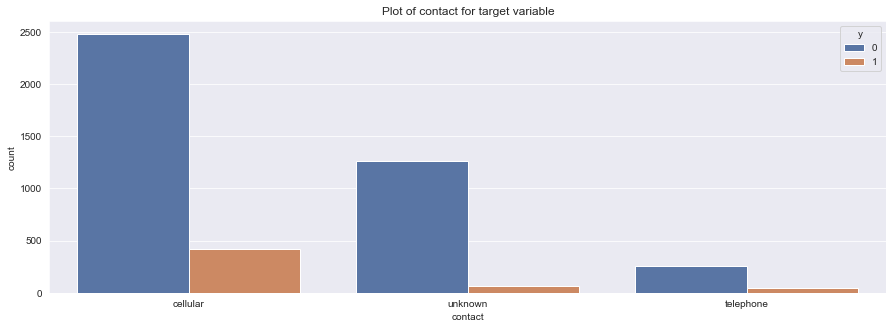

In [20]:
sns.countplot(x=df['contact'], data=df, hue=df['y'])
plt.title('Plot of contact for target variable')

In [21]:
# Plotting 'month'
df.month.astype('category').value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

Text(0.5, 1.0, 'Plot of month for target variable')

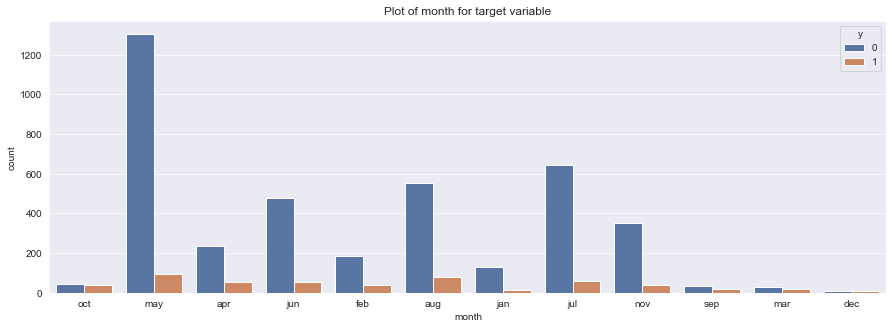

In [22]:
sns.countplot(x=df['month'], data=df, hue=df['y'])
plt.title('Plot of month for target variable')

In [23]:
# Plotting 'poutcome'
df.poutcome.astype('category').value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Plot of poutcome for target variable ')

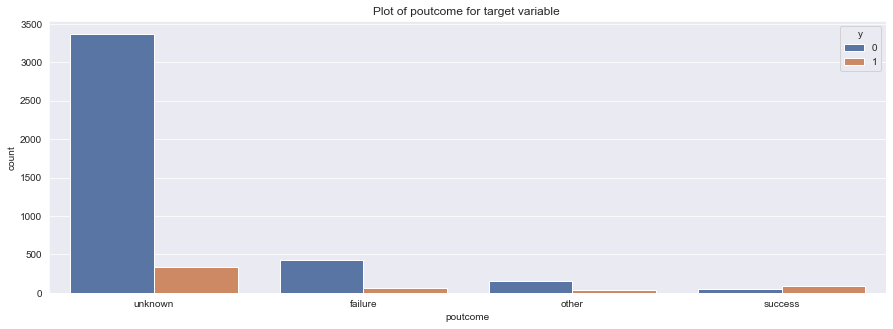

In [24]:
sns.countplot(x=df['poutcome'], data=df, hue=df['y'])
plt.title('Plot of poutcome for target variable ')

In [25]:
# Coverting categorical data into numeric
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0


In [26]:
# Applying One hot encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['poutcome']=le.fit_transform(df['poutcome'])
df['marital']=le.fit_transform(df['marital'])
df['contact']=le.fit_transform(df['contact'])

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,8,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0


### Checking for Outliers

In [28]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.761115,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.631962,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,8.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
90%,56.000000,10.000000,2.000000,2.000000,0.000000,3913.000000,1.000000,1.000000,2.000000,28.000000,579.000000,6.000000,183.000000,2.000000,3.000000,1.000000
95%,59.000000,10.000000,2.000000,2.000000,0.000000,6102.000000,1.000000,1.000000,2.000000,30.000000,763.000000,8.000000,317.000000,3.000000,3.000000,1.000000
99%,72.000000,11.000000,2.000000,3.000000,1.000000,14194.600000,1.000000,1.000000,2.000000,31.000000,1259.000000,16.000000,370.000000,8.000000,3.000000,1.000000


Text(0.5, 0, 'y-target variable No/0 Yes/1')

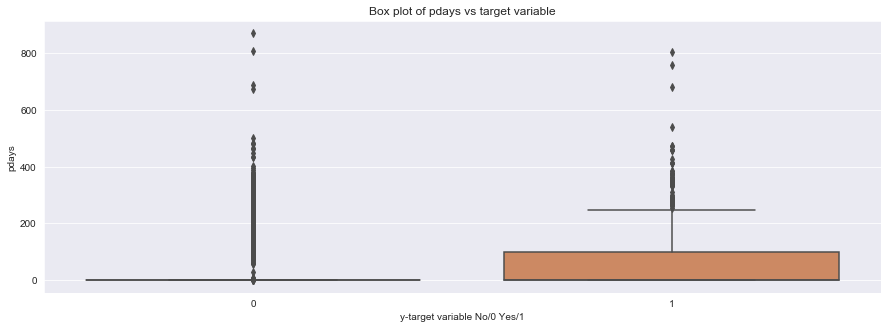

In [29]:
# Plotting pdays
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('Box plot of pdays vs target variable')
plt.xlabel('y-target variable No/0 Yes/1')

###### Observation:

1. The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
2. Mean of pdays is 39.7
3. There are outliers as we can see from boxplot.
4. 75% clients contacted through campaign were not previously contacted.

Text(0.5, 0, 'y-target variable')

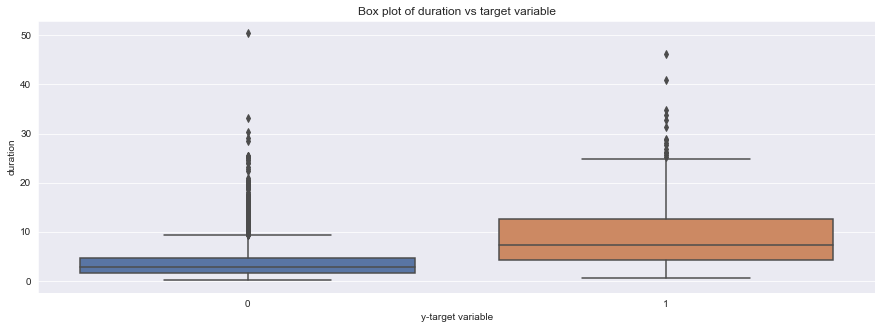

In [30]:
# converting call duration from seconds to minute
df['duration'] = df['duration']/60
# Plotting duration
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs target variable')
plt.xlabel('y-target variable')

###### Observation:

1. The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.
2. 75% call duration are less than or equal to 0.091
3. Duration have a mean of 0.073 and standard-deviation 0.0721
4. There are outliers points in duration.

Text(0.5, 0, 'y-target variable')

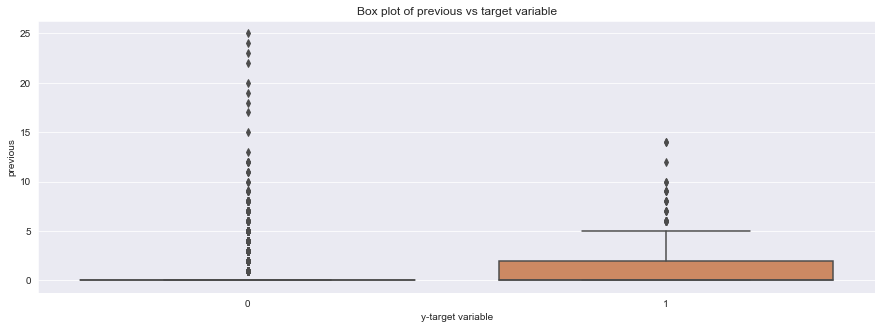

In [31]:
# Plotting 'previous'
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs target variable')
plt.xlabel('y-target variable')

###### Observation:

1. 75% of previous values equal 0 and 99% values <= 8.0
2. Previous have a mean of 0.542 and standard-deviation 1.693
3. There are outliers points in duration.

Text(0.5, 0, 'y-target variable')

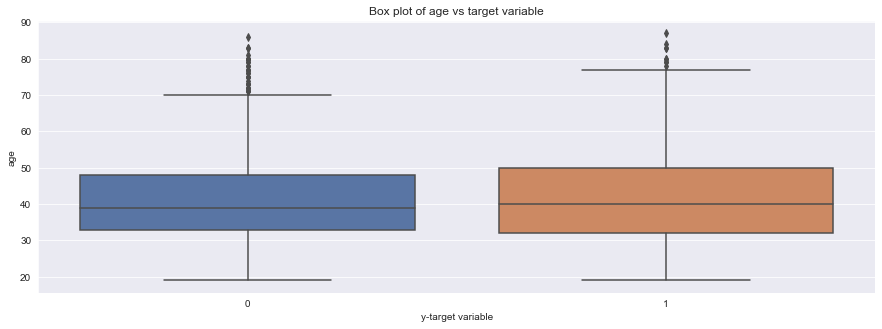

In [32]:
# Plotting Age
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs target variable')
plt.xlabel('y-target variable')

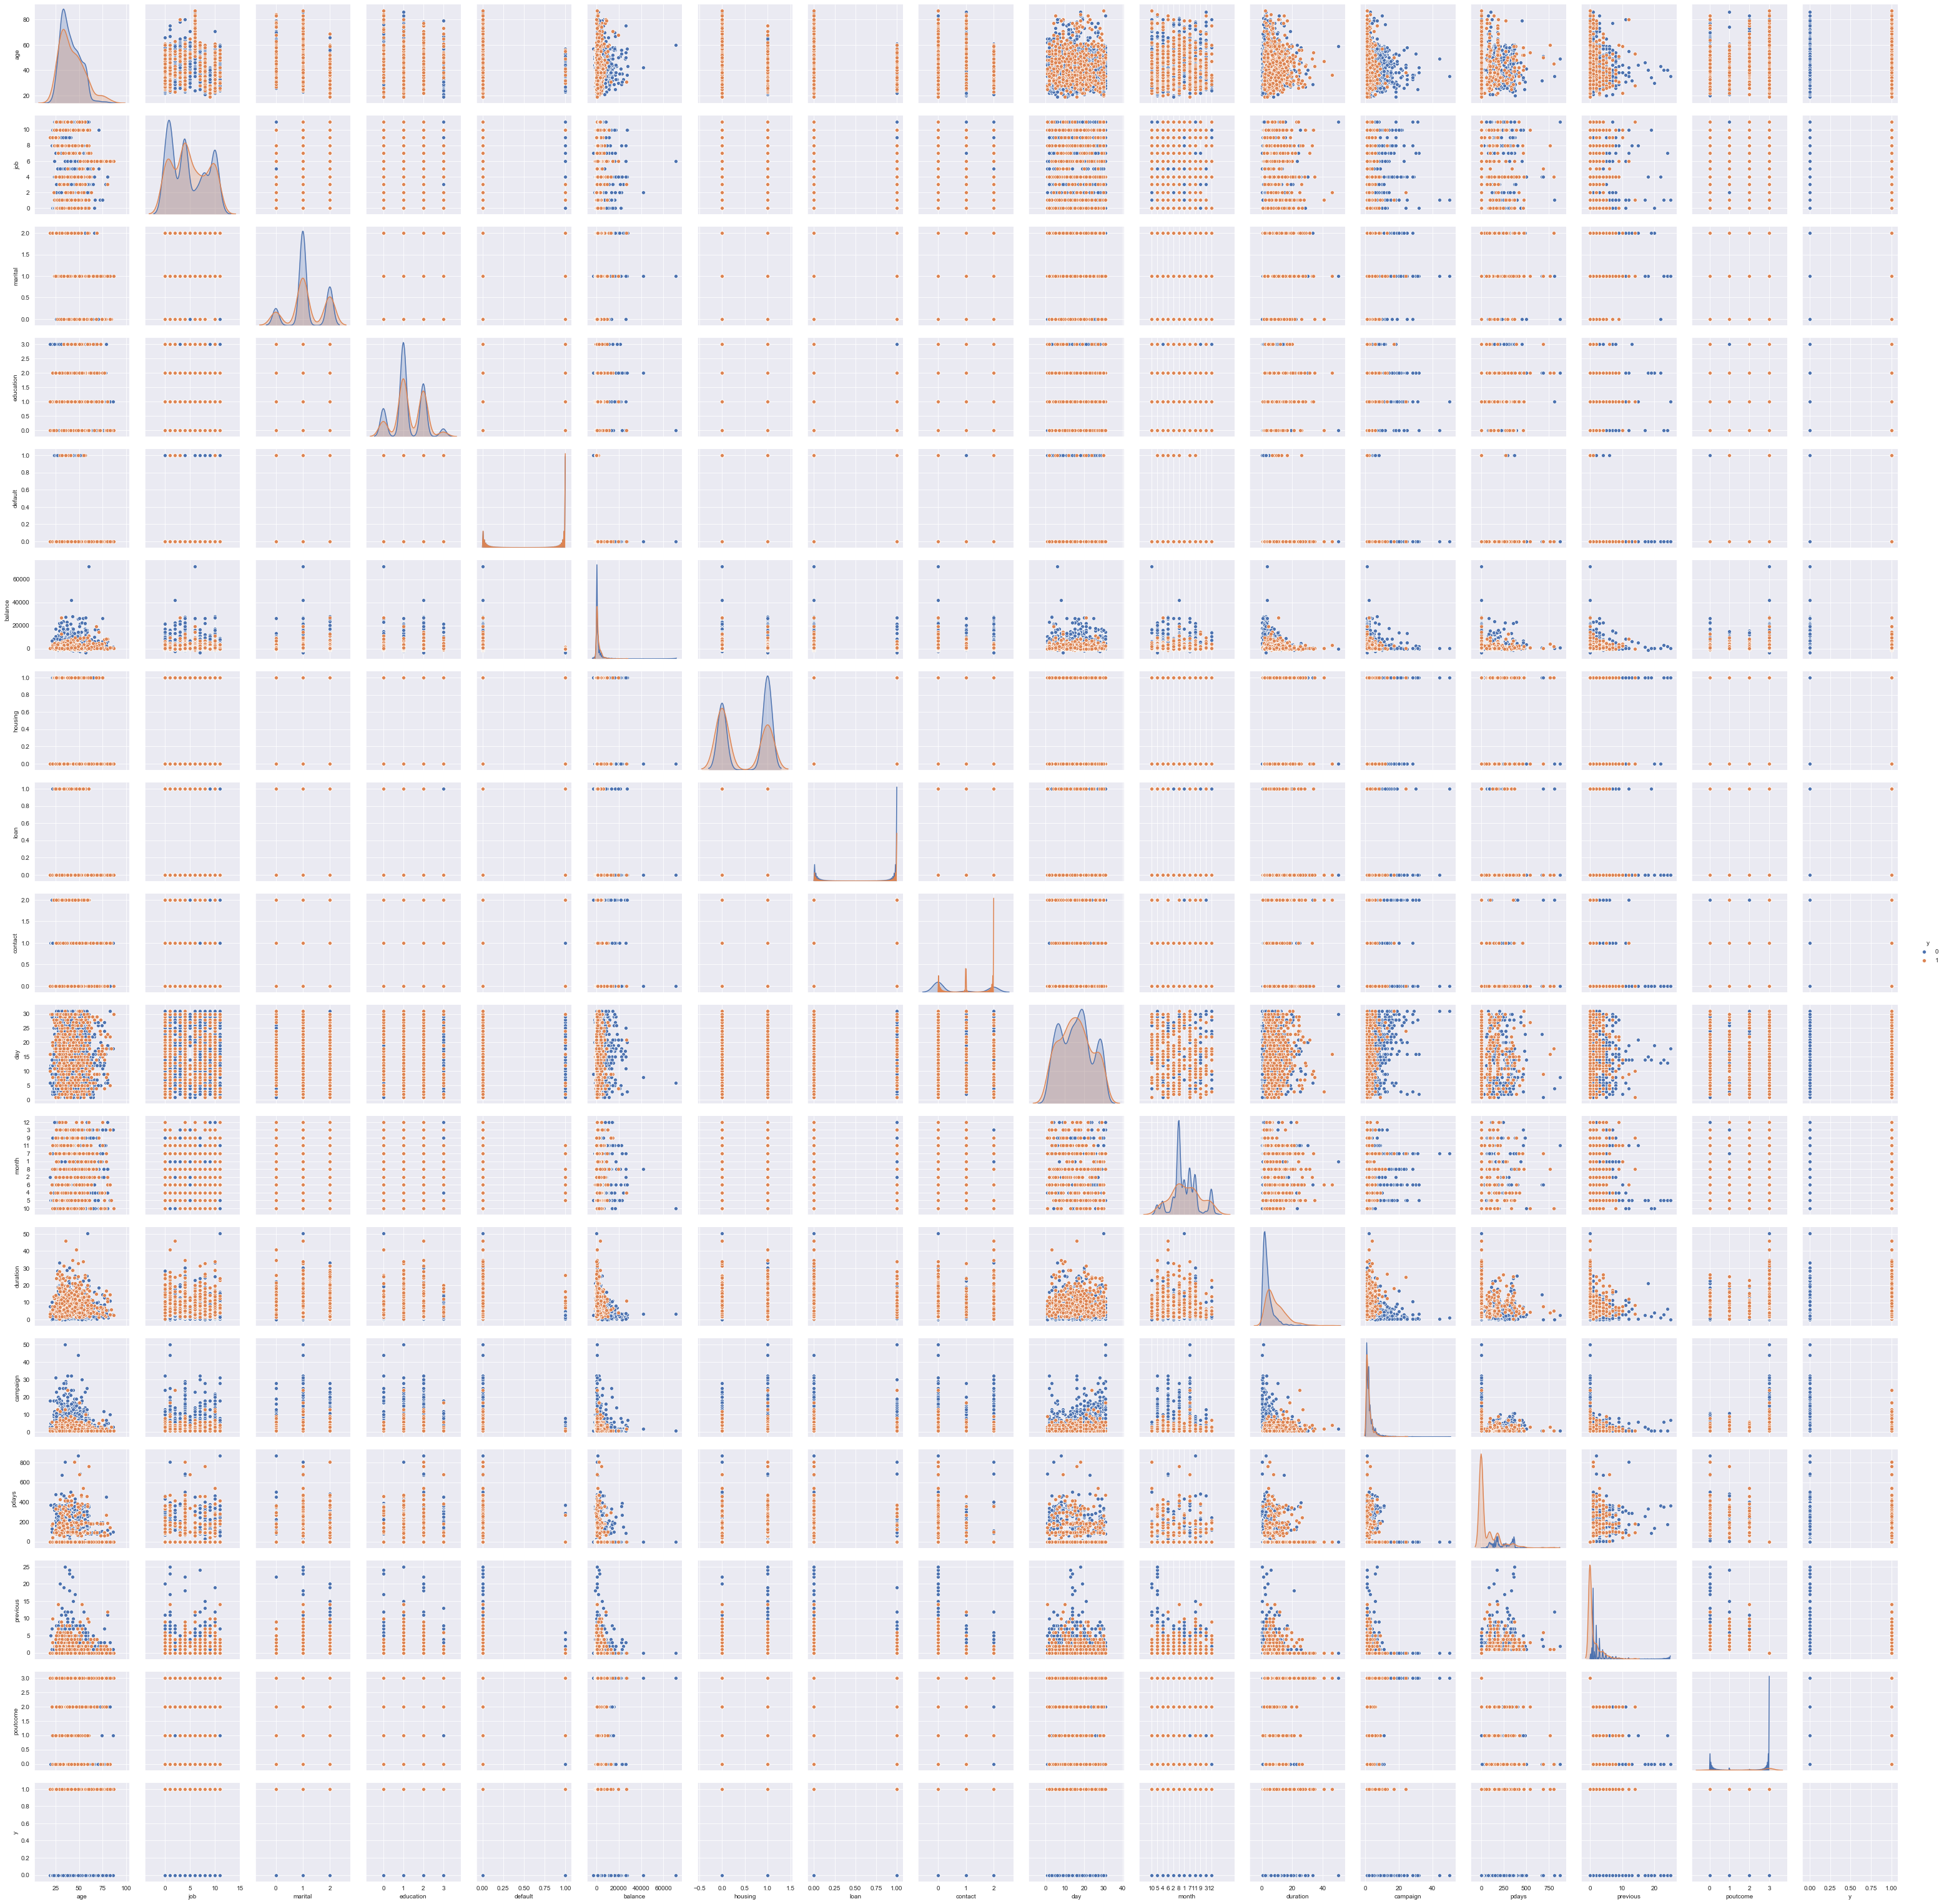

In [33]:
sns.pairplot(df, hue='y')

###### Observation:

1. For most of the variables our pair plot is overlapping a lot.
2. Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

###### Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

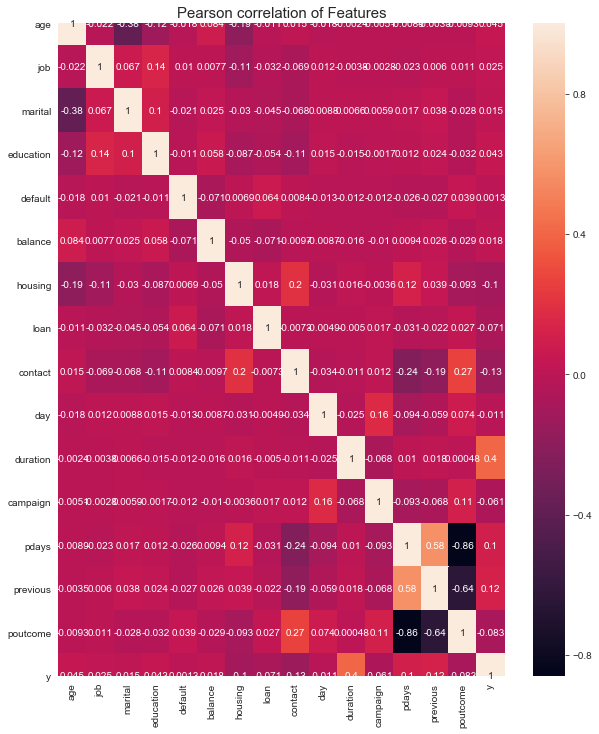

In [34]:
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(corr, ax=ax, annot=True)
plt.title("Pearson correlation of Features", y=1.05, size=15)

##### Handling the outliers

In [35]:
# using zscore
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

[[1.05626965 0.12107186 0.7118608  0.57682947 0.4072183  0.32041282]
 [0.77258281 1.1186443  0.16919389 0.57682947 2.98904408 2.04173372]
 [0.58345826 0.02414438 0.30389844 0.57682947 2.89914302 0.27012381]
 ...
 [1.49691189 0.37472364 0.43475429 2.63916021 0.4072183  0.32041282]
 [1.24539421 0.09492484 0.51942573 0.38796743 1.71045119 1.45119709]
 [0.26760226 0.09525714 0.3118938  0.2552305  2.09003345 3.81334363]]


(3980, 17)

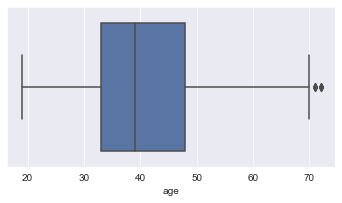

In [36]:
#checking outliers removed or not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.show()

###### We see outliers are removed

#### Dropping less meaningful columns

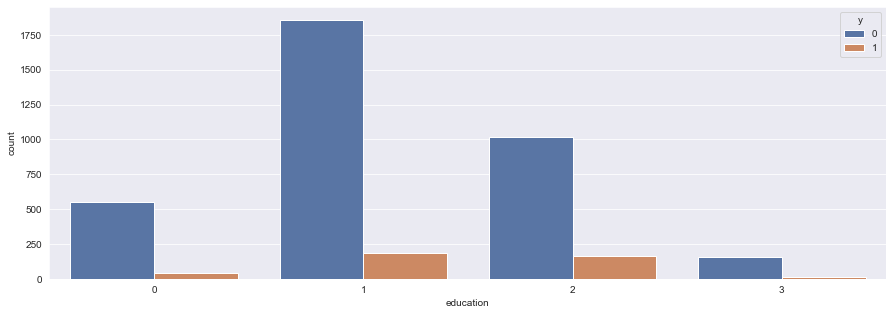

In [37]:
sns.countplot(x='education',hue='y',data=df)

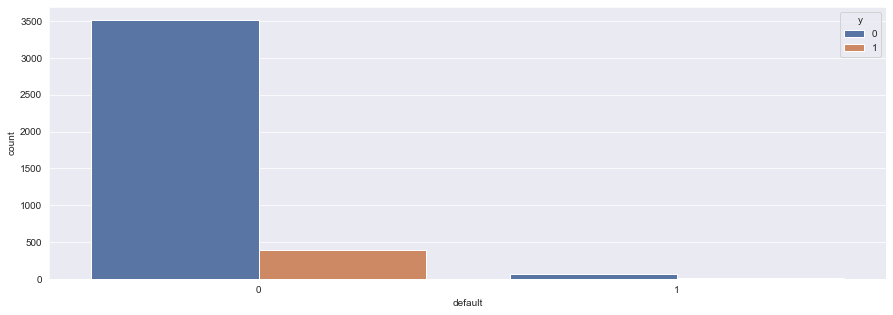

In [38]:
sns.countplot(x='default',hue='y',data=df)

We can drop this feature

In [39]:
df = df.drop('default',axis=1)

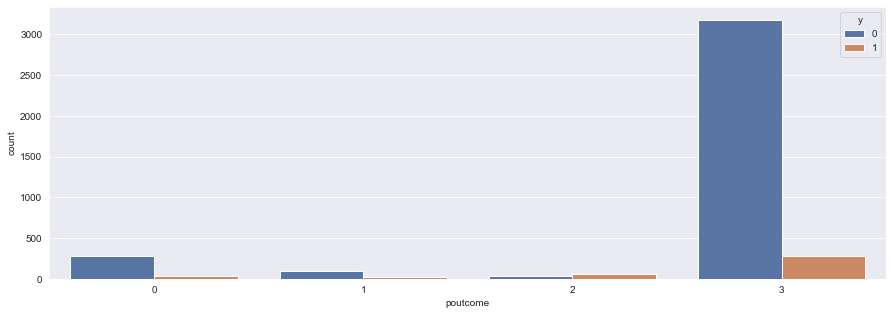

In [40]:
sns.countplot(x='poutcome',hue='y',data=df)

Too many non existent values. We can drop this

In [41]:
df = df.drop('poutcome',axis=1)

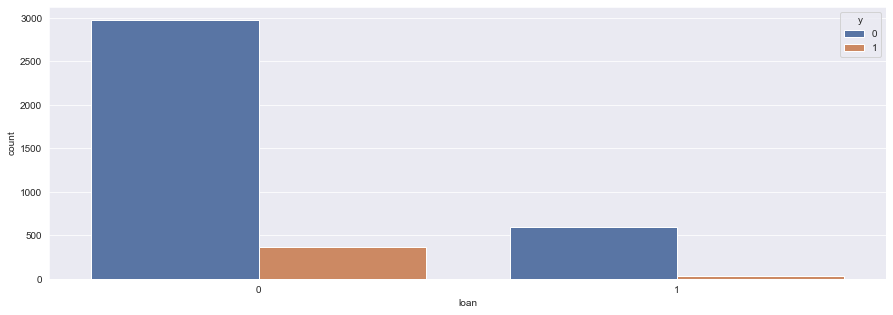

In [42]:
sns.countplot(x='loan',hue='y',data=df)

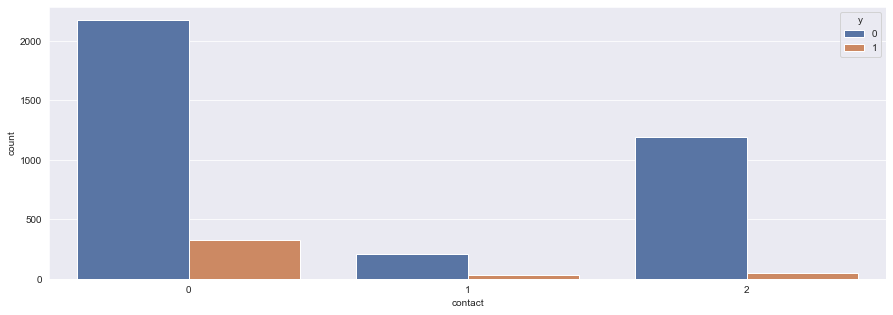

In [43]:
sns.countplot(x='contact',hue='y',data=df)

In [44]:
df = df.drop('contact',axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3980 entries, 0 to 4519
Data columns (total 14 columns):
age          3980 non-null int64
job          3980 non-null int32
marital      3980 non-null int32
education    3980 non-null int32
balance      3980 non-null int64
housing      3980 non-null int64
loan         3980 non-null int64
day          3980 non-null int64
month        3980 non-null object
duration     3980 non-null float64
campaign     3980 non-null int64
pdays        3980 non-null int64
previous     3980 non-null int64
y            3980 non-null int64
dtypes: float64(1), int32(3), int64(9), object(1)
memory usage: 579.8+ KB


In [46]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,30,11,1,0,1787,0,0,19,10,1.316667,1,-1,0,0
1,33,8,1,1,4789,1,1,11,5,3.666667,1,339,4,0
2,35,4,2,2,1350,1,0,16,4,3.083333,1,330,1,0
3,30,4,1,2,1476,1,1,3,6,3.316667,4,-1,0,0
4,59,1,1,1,0,1,0,5,5,3.766667,1,-1,0,0


## Test-Train Split

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [48]:
X = df.drop(['y'], axis=1)
X.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,30,11,1,0,1787,0,0,19,10,1.316667,1,-1,0
1,33,8,1,1,4789,1,1,11,5,3.666667,1,339,4
2,35,4,2,2,1350,1,0,16,4,3.083333,1,330,1
3,30,4,1,2,1476,1,1,3,6,3.316667,4,-1,0
4,59,1,1,1,0,1,0,5,5,3.766667,1,-1,0


In [49]:
# Putting response variable to y
y = df['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [50]:
#dividing the dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2985, 13) (995, 13) (2985,) (995,)


## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [52]:
### Checking the y Rate
target= (sum(df['y'])/len(df['y'].index))*100
print(target)

10.075376884422111


## Model Building

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

In [54]:
model=LogisticRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)

In [55]:
acc_lr=accuracy_score(Y_test,pred)
print("Accuracy:",acc_lr)
recall_lr=recall_score(Y_test,pred)
print("recall:",recall_lr)
precision_lr=precision_score(Y_test,pred)
print("precision:",precision_lr)
f1score_lr=f1_score(Y_test,pred)
print("f1_score:",f1score_lr)
AUC_LR=roc_auc_score(pred,Y_test)
print("ROC_AUC Score:",AUC_LR)

Accuracy: 0.8824120603015075
recall: 0.19298245614035087
precision: 0.46808510638297873
f1_score: 0.2732919254658385
ROC_AUC Score: 0.6855193464404344


[[856  25]
 [ 92  22]]


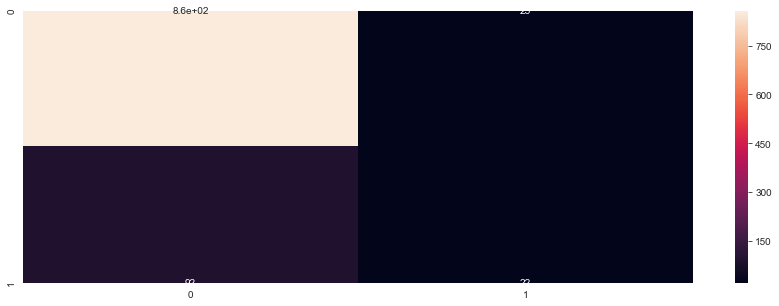

In [56]:
cm=confusion_matrix(Y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

## Model Evaluation

In [57]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [58]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8814070351758794
Confusion Matrix : 
 [[857  24]
 [ 94  20]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       881
           1       0.45      0.18      0.25       114

    accuracy                           0.88       995
   macro avg       0.68      0.57      0.59       995
weighted avg       0.85      0.88      0.86       995



##### The Model's Accuracy on the test data is 92%